# Getting started with your first model in machine learning (fraud detection challenge) in simple steps.

fraudulent transactions has been a major concern in the banking sector.
As we all desire to have easy banking strategies without stress, so also 
there is a corresponding increase in fradulent transactions on accounts. A lot are victims of fradulent transactions as a result of the fact that they were a bit careless in handling sensitive documents or materials given by the bank which gives authorization to their accounts. The banks therefore want to be able to automate transaction monitoring based on certain parameters. Hence this is a problem we can give machines the ability of solving. First and foremost, machines do want to understand the problem before going ahead to solve. Machines do want samples of previous transactions that have been attested to be fradulent and those not found to be fradulent. Inorder to model a problem like this successful for real life application, there is need to know key parameters, known to man, on what determines a fradulent transaction or not.

In solving this problem there is need to access data, without data your computer cannot process.

The sample data for this problem is found on: https://wwww.kaggle.com/c/frauddetectionchallenge

Data Description: In the data given us, the data simple tells us there exist a bank called 'A' that has been battling with lots of fraudulent transactions in their key customers account. They therefore, need a system to help identify fradulent acts (automatively) and then flag them instantly. You as a data scientist, you are called to solve this problem.

Now we do have data, we do need to understand the data we have. Understanding the data you have and knowing the solution to the problem are two different things, what you need to do is to fuse these two so as to make your machine model the problem in the best way it can. 

The question is:
 * What is the Data saying?
 * what do I know about fraudulent transactions?
What the data says?
To understand what the data says we do need to first import the necessary libaries needed to solve this problem in python.

In [1]:
#importing necesary libraries.
import os, sys
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

first read in the data, Since the data is in csv format, we can use the pandas library to do that. We will be reading two csv files because we need one of the csv (train) to build a model and the other to test our model.

In [2]:
train_data = pd.read_csv('train.csv') # train data
test_data = pd.read_csv('test.csv') # test data

First we do need to know the type of informations/parameters we do have that decides fradulent transactions, to do this, we use the pandas libraries to check the column names or keys; either of the two is fine.

In [3]:
train_data.keys()

Index(['id', 'transaction time', 'current bank amount', 'last bank amount',
       'time taken (seconds)', 'most recent bank amount', 'account type',
       'marital_status', 'age', 'occupation', 'credit card type',
       'account source verification', 'transaction source method',
       'account destination verification', 'fradulent'],
      dtype='object')

In [4]:
train_data.columns

Index(['id', 'transaction time', 'current bank amount', 'last bank amount',
       'time taken (seconds)', 'most recent bank amount', 'account type',
       'marital_status', 'age', 'occupation', 'credit card type',
       'account source verification', 'transaction source method',
       'account destination verification', 'fradulent'],
      dtype='object')

This data simply tells us we have:

    * Id - The name of each customer.
    * Transaction time - 
    * Current bank amount - 
    * last bank amount - 
    * time taken (seconds) - 
    * most recent bank amount - 
    * account type - 
    * marital status - 
    * age - 
    * occupation - 
    * credict card type - 
    * account source verification - 
    * transaction source method - 
    * account destination verification - 
    * fradulent -
    
From the data, the main task at hand is to identify the target, fradulent. That is, you are to build a model that learns from other parameters and then learns if that particular transaction on that account is fradulent or not. Let's take a look at the data description using pandas:

In [5]:
train_data.describe()

,current bank amount,last bank amount,time taken (seconds),most recent bank amount,age,fradulent
count,10493.000000,1.049300e+04,10493.000000,10493.000000,10493.000000,10493.000000
mean,50001.984656,7.492752e+05,2508.627657,250768.667588,54.649004,0.276661
std,28681.350627,4.336081e+05,1432.820357,144145.272817,14.350928,0.447369
min,1.000000,8.000000e+00,4.000000,34.000000,30.000000,0.000000
25%,25243.000000,3.787840e+05,1282.000000,126333.000000,42.000000,0.000000
50%,50093.000000,7.485950e+05,2520.000000,253174.000000,55.000000,0.000000
75%,74539.000000,1.126013e+06,3710.000000,376461.000000,67.000000,1.000000
max,99989.000000,1.499877e+06,4999.000000,499926.000000,79.000000,1.000000


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10493 entries, 0 to 10492
Data columns (total 15 columns):
id                                  10493 non-null object
transaction time                    10493 non-null object
current bank amount                 10493 non-null int64
last bank amount                    10493 non-null int64
time taken (seconds)                10493 non-null int64
most recent bank amount             10493 non-null int64
account type                        10493 non-null object
marital_status                      10493 non-null object
age                                 10493 non-null int64
occupation                          10493 non-null object
credit card type                    10493 non-null object
account source verification         10493 non-null bool
transaction source method           10493 non-null bool
account destination verification    10493 non-null bool
fradulent                           10493 non-null int64
dtypes: bool(3), int64(6), object

In [7]:
train_data.shape

(10493, 15)

the describe method in pandas gives a statistical understanding of what the data is about. This communicates alot to us on what we need to know regarding the data. unfortunately, we can only have a descriptive statistics of the data with numerical information. 

The question is how do we know if a column is numerical or not?

from the .info method, shown above, this gives us a detailed overview of what our data entails. The train_data.info(), tells us we have 10493 customers information that we want to learn from. for each column in this case, for example, id has a complete information (non-null) of 10493 valid entries but entries in this column is a string (object), likewise, transaction time, account type, marital status, occupation, credit card type. 
It further tells us we do have, current bank amount, last bank amount, time taken (seconds), most recent bank amount, age and fradulent contains integers (that is why we have a descriptive analysis of all these columns). While the rest, are booleans (we do have descriptive analysis of them also). 

Still all this informations are still vague, we need to know more.

# marital status

In [8]:
def individual_count(data, key):
    return data[key].value_counts()

individual_count(train_data, 'marital_status')

married    5270
single     3122
unknown    2101
Name: marital_status, dtype: int64

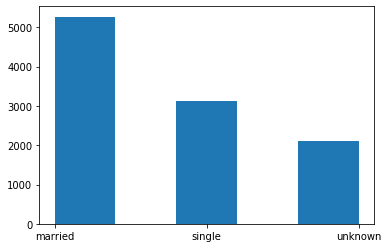

In [9]:
plt.hist(train_data['marital_status'], bins = 5)
plt.show()

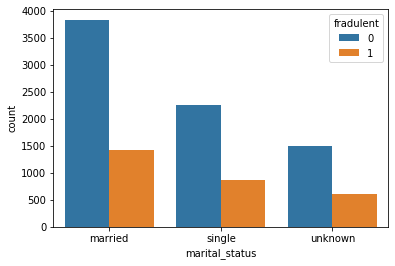

In [10]:
sns.countplot(x = 'marital_status', hue = 'fradulent', data = train_data)

In [11]:
train_data.columns

Index(['id', 'transaction time', 'current bank amount', 'last bank amount',
       'time taken (seconds)', 'most recent bank amount', 'account type',
       'marital_status', 'age', 'occupation', 'credit card type',
       'account source verification', 'transaction source method',
       'account destination verification', 'fradulent'],
      dtype='object')

In [12]:
train_data = train_data.drop(['id', 'current bank amount', 'last bank amount','most recent bank amount'], axis = 1)
test_id = test_data['id']
test_data = test_data.drop(['current bank amount', 'last bank amount','most recent bank amount'], axis = 1)


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10493 entries, 0 to 10492
Data columns (total 11 columns):
transaction time                    10493 non-null object
time taken (seconds)                10493 non-null int64
account type                        10493 non-null object
marital_status                      10493 non-null object
age                                 10493 non-null int64
occupation                          10493 non-null object
credit card type                    10493 non-null object
account source verification         10493 non-null bool
transaction source method           10493 non-null bool
account destination verification    10493 non-null bool
fradulent                           10493 non-null int64
dtypes: bool(3), int64(3), object(5)
memory usage: 686.7+ KB


# Data Visualization

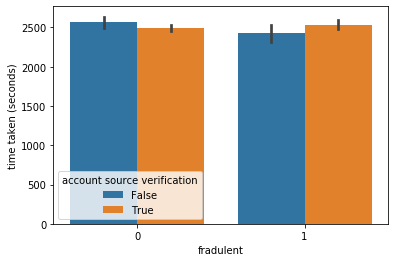

In [14]:
sns.barplot(x = 'fradulent', y = 'time taken (seconds)', hue = 'account source verification', data = train_data,
           orient = 'vertical')

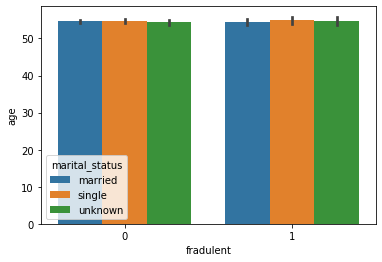

In [15]:
sns.barplot(x = 'fradulent', y = 'age', hue = 'marital_status', data = train_data,
           orient = 'vertical')

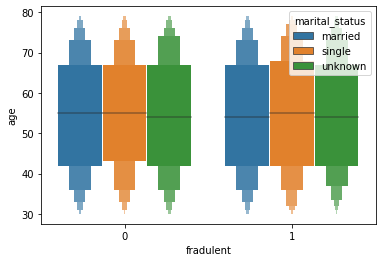

In [16]:
sns.boxenplot(x = 'fradulent', y = 'age', hue = 'marital_status', data = train_data)

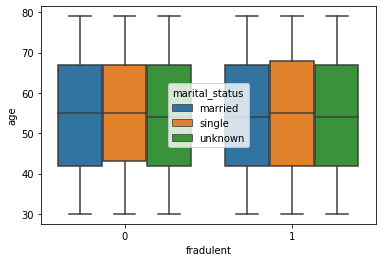

In [17]:
sns.boxplot(x = 'fradulent', y = 'age', hue = 'marital_status', data = train_data)

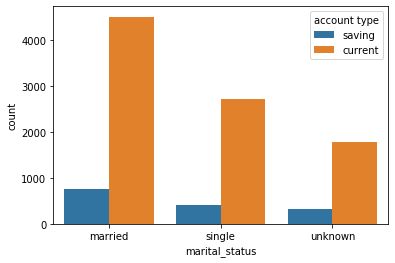

In [18]:
sns.countplot(x = 'marital_status', hue = 'account type', data = train_data)

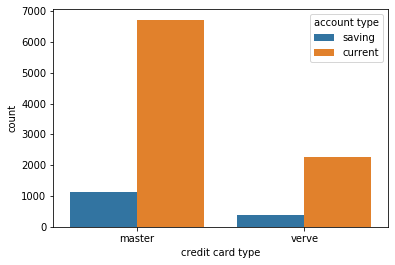

In [19]:
sns.countplot(x = 'credit card type', hue = 'account type', data = train_data)

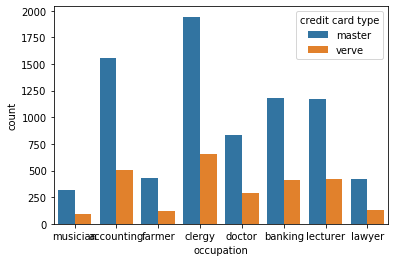

In [20]:
sns.countplot(x = 'occupation', hue = 'credit card type', data = train_data)

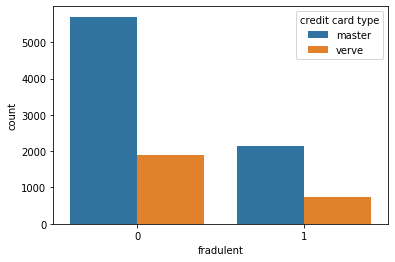

In [21]:
sns.countplot(x = 'fradulent', hue = 'credit card type', data = train_data)

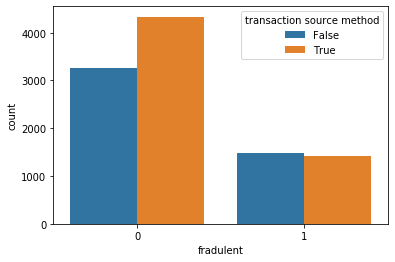

In [22]:
sns.countplot(x = 'fradulent', hue = 'transaction source method', data = train_data)

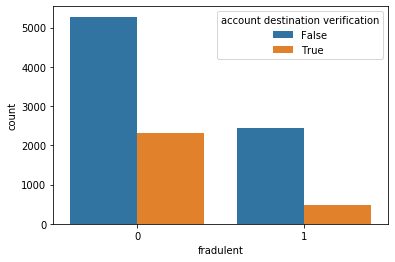

In [23]:
sns.countplot(x = 'fradulent', hue = 'account destination verification', data = train_data)

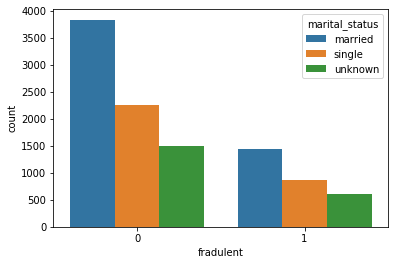

In [24]:
sns.countplot(x = 'fradulent', hue = 'marital_status', data = train_data)

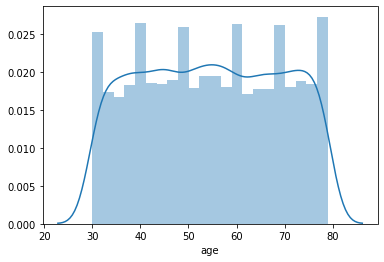

In [25]:
sns.distplot(train_data['age'])

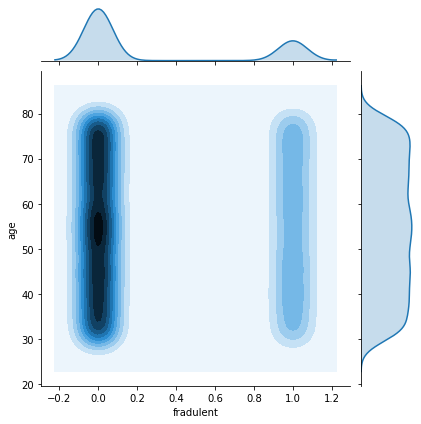

In [26]:
sns.jointplot(x = 'fradulent', y = 'age', kind = 'kde', data = train_data)


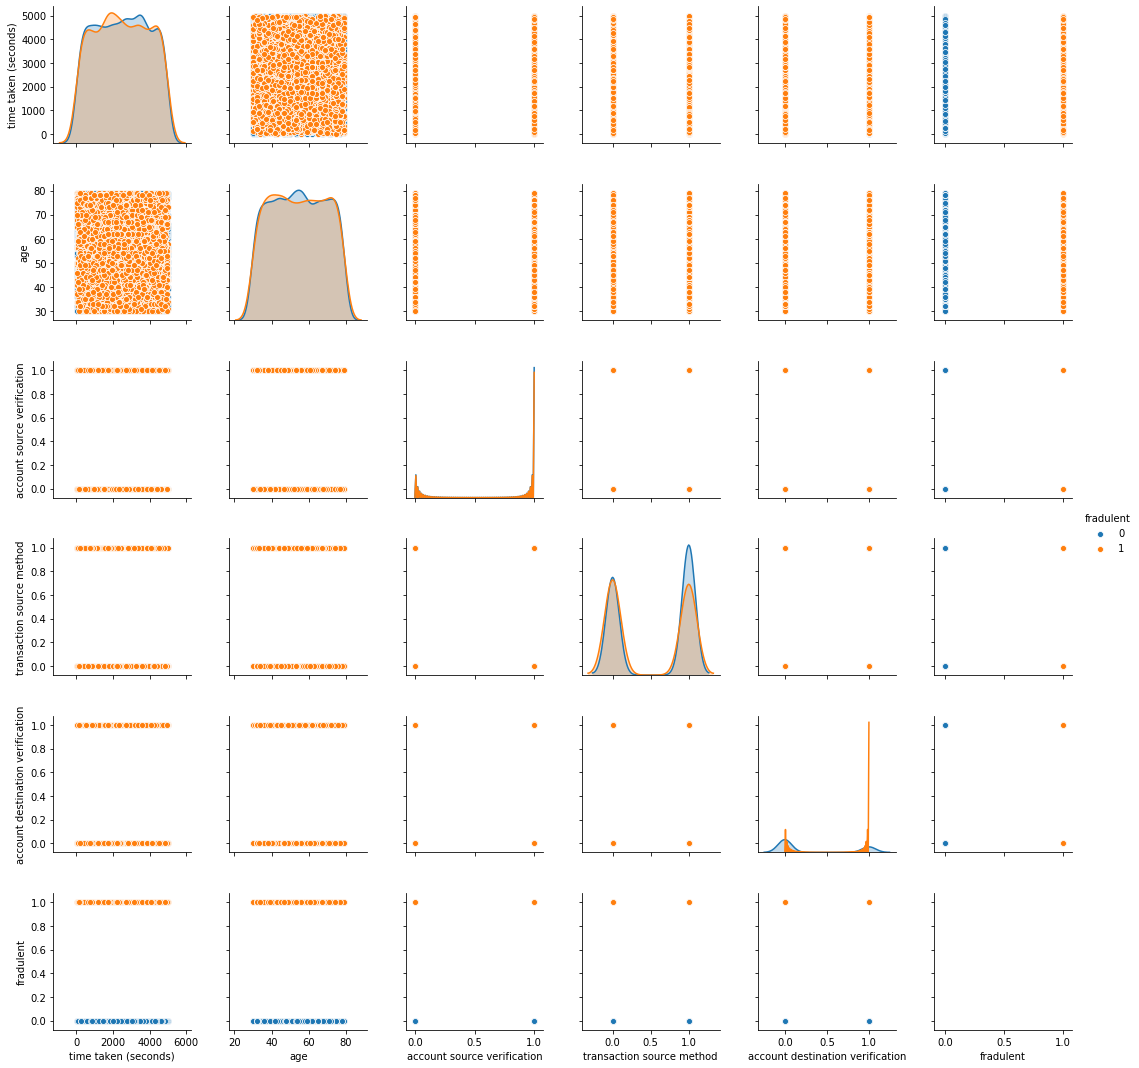

In [27]:
sns.pairplot(data = train_data, hue= 'fradulent')

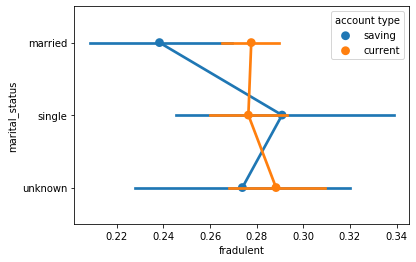

In [28]:
sns.pointplot(y = 'marital_status',x = 'fradulent', hue = 'account type', data = train_data)

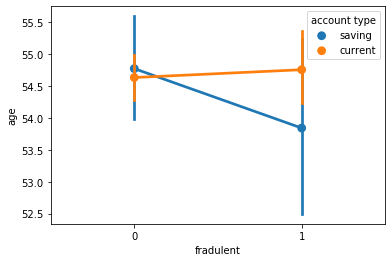

In [29]:
sns.pointplot(y = 'age',x = 'fradulent', hue = 'account type', data = train_data)

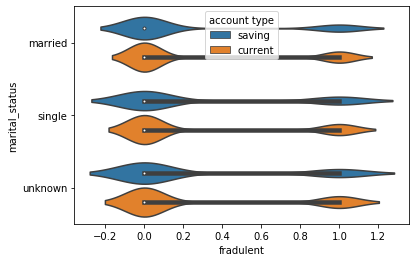

In [30]:
sns.violinplot(y = 'marital_status',x = 'fradulent', hue = 'account type', data = train_data)

In [31]:
train_data.columns

Index(['transaction time', 'time taken (seconds)', 'account type',
       'marital_status', 'age', 'occupation', 'credit card type',
       'account source verification', 'transaction source method',
       'account destination verification', 'fradulent'],
      dtype='object')

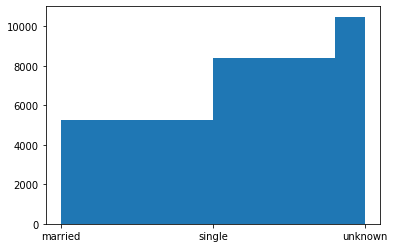

In [32]:
plt.hist(train_data['marital_status'], stacked = True, histtype = 'bar', cumulative = True)
plt.box(True)
plt.show()

In [33]:
train_target = train_data['fradulent']
train_data = train_data.drop('fradulent', axis = 1)

In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10493 entries, 0 to 10492
Data columns (total 10 columns):
transaction time                    10493 non-null object
time taken (seconds)                10493 non-null int64
account type                        10493 non-null object
marital_status                      10493 non-null object
age                                 10493 non-null int64
occupation                          10493 non-null object
credit card type                    10493 non-null object
account source verification         10493 non-null bool
transaction source method           10493 non-null bool
account destination verification    10493 non-null bool
dtypes: bool(3), int64(2), object(5)
memory usage: 604.7+ KB


# Transaction Time

In [35]:
train_data['transaction time'][:5]

0    2016-10-05T01:44:58
1    2015-01-14T15:05:07
2    2016-10-28T13:44:58
3    2016-11-20T15:05:32
4    2015-09-01T16:11:57
Name: transaction time, dtype: object

In [36]:
test = train_data['transaction time'][0]
time_year, time_month, time_day, time_hour, time_minute, time_seconds = [],[],[],[],[],[]
def split_data(test):
    val = test.split(':')
    minutes = val[1]
    time_minute.append(int(minutes))
    seconds = val[2]
    time_seconds.append(int(seconds))
    out_val = val[0].split('-')
    year =out_val[0]
    time_year.append(int(year))
    month = out_val[1]
    time_month.append(int(month))
    out_split = out_val[2].split('T')
    day = out_split[0]
    time_day.append(int(day))
    hour = out_split[1]
    time_hour.append(int(hour))
    return year, month, day, hour, minutes, seconds

split_data(test)

('2016', '10', '05', '01', '44', '58')

In [37]:
#train
time_year, time_month, time_day, time_hour, time_minute, time_seconds = [],[],[],[],[],[]
time_out = train_data['transaction time'].apply(split_data)
#train_data['time year'] = time_year
#train_data['time month'] = time_month
#train_data['time day'] = time_day
train_data['time hour'] = time_hour
train_data['time minute'] = time_minute
train_data['time seconds'] = time_seconds

#test
time_year, time_month, time_day, time_hour, time_minute, time_seconds = [],[],[],[],[],[]
test_time_out = test_data['transaction time'].apply(split_data)
#test_data['time year'] = time_year
#test_data['time month'] = time_month
#test_data['time day'] = time_day
test_data['time hour'] = time_hour
test_data['time minute'] = time_minute
test_data['time seconds'] = time_seconds

In [38]:
train_data = train_data.drop('transaction time', axis = 1)
test_data = test_data.drop('transaction time', axis = 1)

In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10493 entries, 0 to 10492
Data columns (total 12 columns):
time taken (seconds)                10493 non-null int64
account type                        10493 non-null object
marital_status                      10493 non-null object
age                                 10493 non-null int64
occupation                          10493 non-null object
credit card type                    10493 non-null object
account source verification         10493 non-null bool
transaction source method           10493 non-null bool
account destination verification    10493 non-null bool
time hour                           10493 non-null int64
time minute                         10493 non-null int64
time seconds                        10493 non-null int64
dtypes: bool(3), int64(5), object(4)
memory usage: 768.7+ KB


In [40]:
#train = pd.get_dummies(train_data, columns = ['account type', 'marital_status', 'occupation','credit card type'])
train = train_data.drop(['account type', 'marital_status','occupation','credit card type'], axis = 1)
test = test_data.drop(['account type', 'marital_status','occupation','credit card type'], axis = 1)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10493 entries, 0 to 10492
Data columns (total 8 columns):
time taken (seconds)                10493 non-null int64
age                                 10493 non-null int64
account source verification         10493 non-null bool
transaction source method           10493 non-null bool
account destination verification    10493 non-null bool
time hour                           10493 non-null int64
time minute                         10493 non-null int64
time seconds                        10493 non-null int64
dtypes: bool(3), int64(5)
memory usage: 440.7 KB


# Encoding

In [41]:
# creating instance of labelencoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train['account source verification'] = labelencoder.fit_transform(train['account source verification'])
train['account destination verification'] = labelencoder.fit_transform(train['account destination verification'])
train['transaction source method'] = labelencoder.fit_transform(train['transaction source method'])

In [42]:
test['account source verification'] = labelencoder.fit_transform(test['account source verification'])
test['account destination verification'] = labelencoder.fit_transform(test['account destination verification'])
test['transaction source method'] = labelencoder.fit_transform(test['transaction source method'])

In [43]:


train = train.drop('time taken (seconds)', axis = 1)
test = test.drop('time taken (seconds)', axis = 1)

In [44]:
train = train.drop('age', axis = 1)
test = test.drop('age', axis = 1)


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10493 entries, 0 to 10492
Data columns (total 6 columns):
account source verification         10493 non-null int64
transaction source method           10493 non-null int64
account destination verification    10493 non-null int64
time hour                           10493 non-null int64
time minute                         10493 non-null int64
time seconds                        10493 non-null int64
dtypes: int64(6)
memory usage: 492.0 KB


In [46]:
train.head()

,account source verification,transaction source method,account destination verification,time hour,time minute,time seconds
0,1,0,1,1,44,58
1,1,0,0,15,5,7
2,1,1,1,13,44,58
3,1,1,1,15,5,32
4,0,0,1,16,11,57


In [47]:
test_id = test['id']
test = test.drop('id',axis = 1)
train.shape, test.shape

((10493, 6), (4507, 6))

In [48]:
for k in train.columns:
    if k in test.columns:
        pass
    else:
        print(k)

# standardize


In [49]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
std_scaler = MinMaxScaler()
train_transform = std_scaler.fit_transform(train)
test_transform = std_scaler.transform(test)

# modelling 

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, auc, roc_auc_score



In [51]:
train_target[:2]

0    0
1    0
Name: fradulent, dtype: int64

In [52]:
x_train, x_test, y_train, y_test = train_test_split(train_transform, train_target, test_size = 0.3, random_state = 42, stratify = train_target)

In [53]:
model_grb = GradientBoostingClassifier()
model = model_grb.fit(x_train, y_train)
y_pred = model_grb.predict(x_test)
print('train score: ', model_grb.score(x_train, y_train))
print('test score: ' , accuracy_score(y_test, y_pred))
#print('auc score: ', auc(y_test, y_pred))
print('roc_auc score: ', roc_auc_score(y_test, y_pred))

train score:  0.7677331518039483
test score:  0.7226810673443456
roc_auc score:  0.6119264324974902


In [54]:
trial = pd.DataFrame(test_transform, columns = train.columns)
trial.head()

,account source verification,transaction source method,account destination verification,time hour,time minute,time seconds
0,1.0,1.0,0.0,0.521739,0.864407,0.728814
1,1.0,0.0,0.0,0.782609,0.067797,0.050847
2,1.0,0.0,0.0,0.173913,0.101695,0.932203
3,0.0,0.0,1.0,0.173913,0.677966,0.762712
4,1.0,0.0,1.0,0.217391,0.152542,0.559322


In [55]:
test_predict = model_grb.predict(test_transform)


In [56]:
frame_dict = {}
frame_dict['id'] = test_id
frame_dict['fradulent'] = test_predict
frame = pd.DataFrame(frame_dict)
frame.to_csv('xgboost.csv', index= False)